<a href="https://colab.research.google.com/github/cchio74/forgemaster/blob/master/lab08_superstore_LHC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#데이터 전처리

출처: 
https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b

In [73]:
#데이터 불러오기
df=pd.read_excel('/content/Sample - Superstore.xls',index_col='Row ID')
df.head(2)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [74]:
#Category의 종류
df['Category'].unique()   #함수가 아니라 []사용

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [75]:
df=df.loc[:,['Order Date','Category','Sales']]  #df를 다시 어사인하여 다시 정의
df

,Order Date,Category,Sales
Row ID,,,
1,2016-11-08,Furniture,261.9600
2,2016-11-08,Furniture,731.9400
3,2016-06-12,Office Supplies,14.6200
4,2015-10-11,Furniture,957.5775
5,2015-10-11,Office Supplies,22.3680
...,...,...,...
9990,2014-01-21,Furniture,25.2480
9991,2017-02-26,Furniture,91.9600
9992,2017-02-26,Technology,258.5760


In [76]:
#Category를 기준으로 구분 -> 피봇 테이블, Category와 날짜로 분류, 대분류는 Category, 소분류는 날짜
df=df.pivot_table(values='Sales',index=['Category','Order Date'],aggfunc='sum')

In [77]:
df.to_excel('test.xlsx') #새로 정의한 df만 excel로 추출

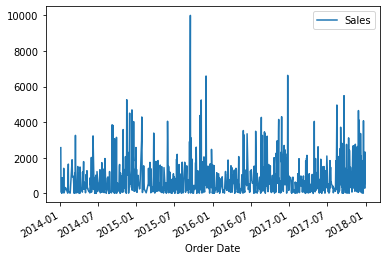

In [78]:
#df 중 가구만 분류
df.loc['Furniture'].plot()  #생각보다 경향성이 보이지 않음.

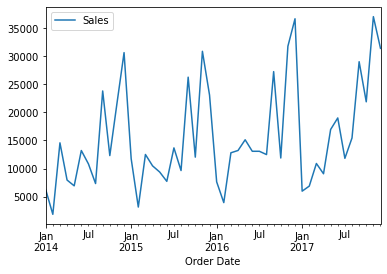

In [79]:
#따라서 월별 또는 주별로 합하여 덩어리로 분석을 할 수도 있음
df.loc['Furniture'].resample('MS').sum().plot()

In [80]:
furniture=df.loc['Furniture'].resample('MS').sum()
furniture.head()

,Sales
Order Date,
2014-01-01,6242.525
2014-02-01,1839.658
2014-03-01,14573.956
2014-04-01,7944.837
2014-05-01,6912.787


#이동평균

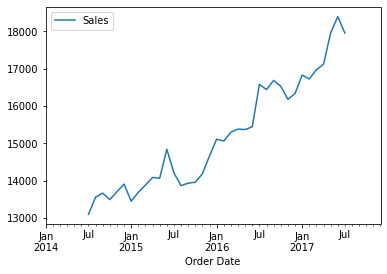

In [81]:
#위처럼 월을 년단위로 묶을 수 있음. 하지만 본 장에서는 이동평균을 계산하는 함수를 알아보고자 한다.
furniture.rolling(12,center=True).mean().plot() #center는 중간을 기준으로 평균을 냄

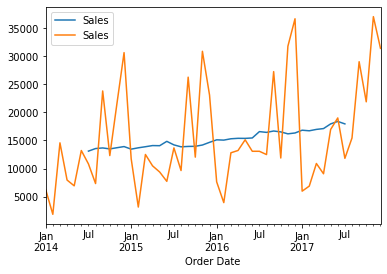

In [82]:
fig,ax=plt.subplots()
furniture.rolling(12,center=True).mean().plot(ax=ax)
furniture.plot(ax=ax)
plt.show()

#시계열 분해



In [83]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [84]:
model=seasonal_decompose(furniture)

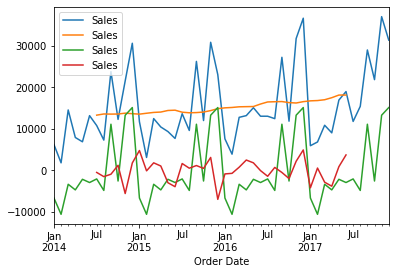

In [85]:
fig,ax=plt.subplots()
furniture.plot(ax=ax)
model.trend.plot(ax=ax) #위에 우리가 한거랑 똑같음.
model.seasonal.plot(ax=ax)
model.resid.plot(ax=ax) 
plt.show()

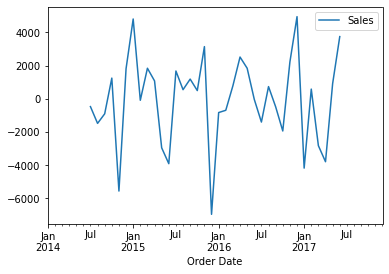

In [86]:
model.resid.plot() 

#예측모델 1. ARIMA

In [87]:
#예측모델 1. ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

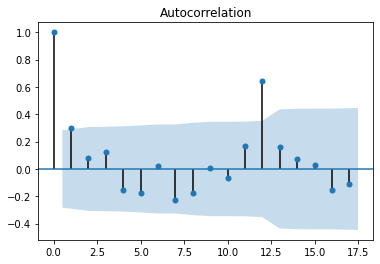

In [88]:
plot_acf(furniture)
plt.show()

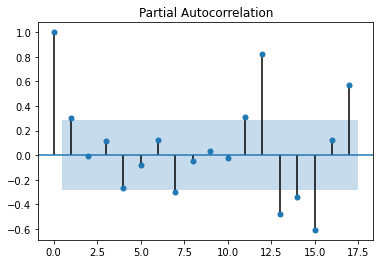

In [89]:
plot_pacf(furniture)
plt.show()

In [90]:
model=ARIMA(furniture,order=(1,1,0))

In [91]:
fit=model.fit()

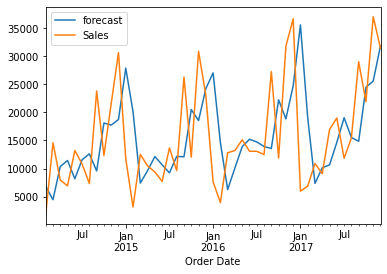

In [92]:
fit.plot_predict()
plt.show()

#예측모델 2.Facebook Prophet

In [93]:
from fbprophet import Prophet

In [96]:
#데이터 수정->시간은 ds, 값은 y로 colume name을 달아야 함, dictionary는 중괄호
furniture=furniture.reset_index().rename(columns={'Order Date':'ds','Sales':'y'})
furniture


,ds,y
0,2014-01-01,6242.5250
1,2014-02-01,1839.6580
2,2014-03-01,14573.9560
3,2014-04-01,7944.8370
4,2014-05-01,6912.7870
5,2014-06-01,13206.1256
6,2014-07-01,10821.0510
7,2014-08-01,7320.3465
8,2014-09-01,23816.4808
9,2014-10-01,12304.2470


In [97]:
model=Prophet()

In [98]:
model.fit(furniture)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [99]:
model.predict()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-01-01,12299.085085,1552.234325,7710.519485,12299.085085,12299.085085,-7725.979830,-7725.979830,-7725.979830,-7725.979830,-7725.979830,-7725.979830,0.0,0.0,0.0,4573.105255
1,2014-02-01,12437.274304,-1427.671990,4606.489476,12437.274304,12437.274304,-10839.295969,-10839.295969,-10839.295969,-10839.295969,-10839.295969,-10839.295969,0.0,0.0,0.0,1597.978335
2,2014-03-01,12562.090374,7906.307657,13865.894869,12562.090374,12562.090374,-1619.609580,-1619.609580,-1619.609580,-1619.609580,-1619.609580,-1619.609580,0.0,0.0,0.0,10942.480794
3,2014-04-01,12700.279594,4822.474301,11052.357374,12700.279594,12700.279594,-4883.653720,-4883.653720,-4883.653720,-4883.653720,-4883.653720,-4883.653720,0.0,0.0,0.0,7816.625874
4,2014-05-01,12834.011097,5885.108502,11860.843758,12834.011097,12834.011097,-3989.097033,-3989.097033,-3989.097033,-3989.097033,-3989.097033,-3989.097033,0.0,0.0,0.0,8844.914064
5,2014-06-01,12972.200317,7328.630400,13270.358779,12972.200317,12972.200317,-2693.370216,-2693.370216,-2693.370216,-2693.370216,-2693.370216,-2693.370216,0.0,0.0,0.0,10278.830101
6,2014-07-01,13105.931821,7459.930509,13618.272380,13105.931821,13105.931821,-2537.941457,-2537.941457,-2537.941457,-2537.941457,-2537.941457,-2537.941457,0.0,0.0,0.0,10567.990364
7,2014-08-01,13244.121042,5493.362901,11707.726564,13244.121042,13244.121042,-4600.719925,-4600.719925,-4600.719925,-4600.719925,-4600.719925,-4600.719925,0.0,0.0,0.0,8643.401117
8,2014-09-01,13382.310264,21550.504084,27524.313169,13382.310264,13382.310264,11121.345567,11121.345567,11121.345567,11121.345567,11121.345567,11121.345567,0.0,0.0,0.0,24503.655831
9,2014-10-01,13516.041769,9259.153292,15335.147520,13516.041769,13516.041769,-1102.589113,-1102.589113,-1102.589113,-1102.589113,-1102.589113,-1102.589113,0.0,0.0,0.0,12413.452655


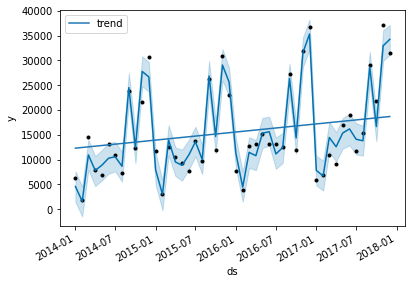

In [108]:
fig,ax=plt.subplots()
model.plot(model.predict(),ax=ax)
model.predict().plot('ds','trend',ax=ax)
plt.show()

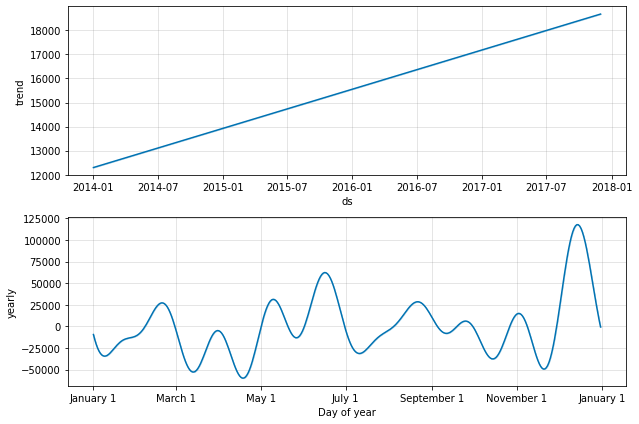

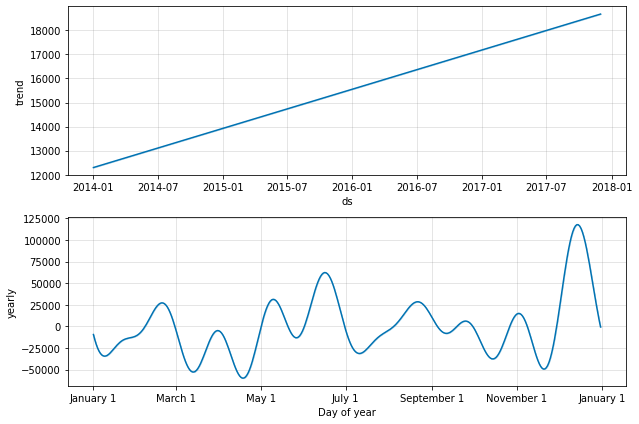

In [109]:
model.plot_components(model.predict())

In [115]:
#예측하고 싶은 날짜를 넣으면 됨
model.predict().head(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-01-01,12299.085085,1678.277736,7288.932263,12299.085085,12299.085085,-7725.979830,-7725.979830,-7725.979830,-7725.979830,-7725.979830,-7725.979830,0.0,0.0,0.0,4573.105255
1,2014-02-01,12437.274304,-1417.102503,4612.829726,12437.274304,12437.274304,-10839.295969,-10839.295969,-10839.295969,-10839.295969,-10839.295969,-10839.295969,0.0,0.0,0.0,1597.978335
2,2014-03-01,12562.090374,7892.025338,13987.912862,12562.090374,12562.090374,-1619.609580,-1619.609580,-1619.609580,-1619.609580,-1619.609580,-1619.609580,0.0,0.0,0.0,10942.480794
3,2014-04-01,12700.279594,4623.305502,11002.976235,12700.279594,12700.279594,-4883.653720,-4883.653720,-4883.653720,-4883.653720,-4883.653720,-4883.653720,0.0,0.0,0.0,7816.625874
4,2014-05-01,12834.011097,5819.918528,12188.843428,12834.011097,12834.011097,-3989.097033,-3989.097033,-3989.097033,-3989.097033,-3989.097033,-3989.097033,0.0,0.0,0.0,8844.914064


In [113]:
future=model.make_future_dataframe(24,freq='MS')
future.tail(5)

,ds
67,2019-08-01
68,2019-09-01
69,2019-10-01
70,2019-11-01
71,2019-12-01


In [114]:
model.predict(future)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-01-01,12299.085085,1418.223836,7512.674164,12299.085085,12299.085085,-7725.979830,-7725.979830,-7725.979830,-7725.979830,-7725.979830,-7725.979830,0.0,0.0,0.0,4573.105255
1,2014-02-01,12437.274304,-1192.151036,4640.764142,12437.274304,12437.274304,-10839.295969,-10839.295969,-10839.295969,-10839.295969,-10839.295969,-10839.295969,0.0,0.0,0.0,1597.978335
2,2014-03-01,12562.090374,8092.817339,14158.314118,12562.090374,12562.090374,-1619.609580,-1619.609580,-1619.609580,-1619.609580,-1619.609580,-1619.609580,0.0,0.0,0.0,10942.480794
3,2014-04-01,12700.279594,4891.602269,10860.674369,12700.279594,12700.279594,-4883.653720,-4883.653720,-4883.653720,-4883.653720,-4883.653720,-4883.653720,0.0,0.0,0.0,7816.625874
4,2014-05-01,12834.011097,5796.434420,11753.325660,12834.011097,12834.011097,-3989.097033,-3989.097033,-3989.097033,-3989.097033,-3989.097033,-3989.097033,0.0,0.0,0.0,8844.914064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2019-08-01,21386.812675,13516.786448,19729.192257,21386.629336,21386.996288,-4857.959505,-4857.959505,-4857.959505,-4857.959505,-4857.959505,-4857.959505,0.0,0.0,0.0,16528.853171
68,2019-09-01,21525.071482,30058.559064,36329.278301,21524.872366,21525.270832,11827.320378,11827.320378,11827.320378,11827.320378,11827.320378,11827.320378,0.0,0.0,0.0,33352.391860
69,2019-10-01,21658.870328,18444.239127,24212.426431,21658.658612,21659.082618,-480.573553,-480.573553,-480.573553,-480.573553,-480.573553,-480.573553,0.0,0.0,0.0,21178.296774
70,2019-11-01,21797.129134,32378.006867,38615.330785,21796.903856,21797.355965,13763.883003,13763.883003,13763.883003,13763.883003,13763.883003,13763.883003,0.0,0.0,0.0,35561.012137


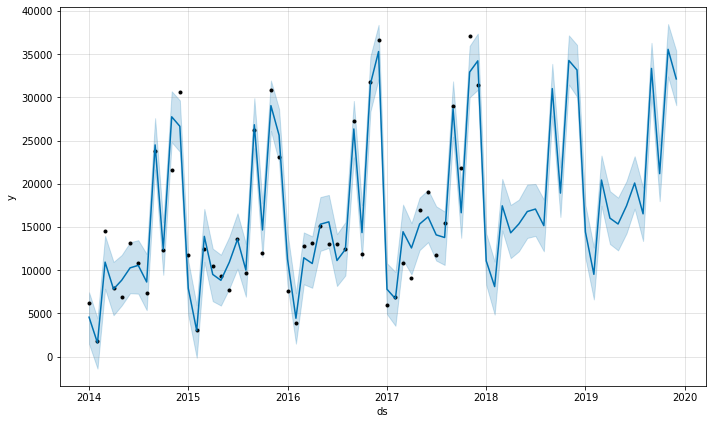

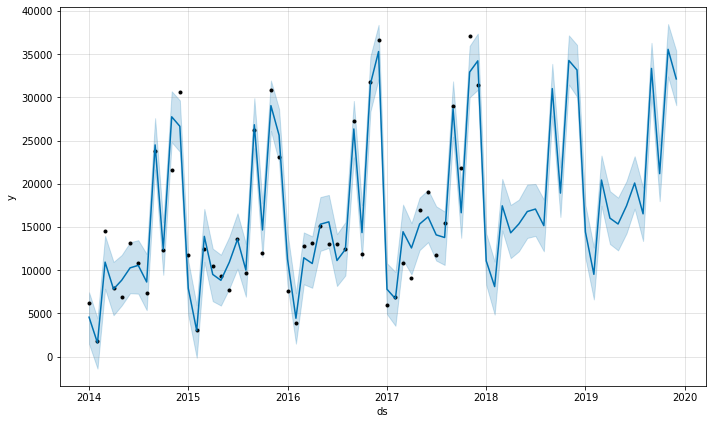

In [116]:
model.plot(model.predict(future))

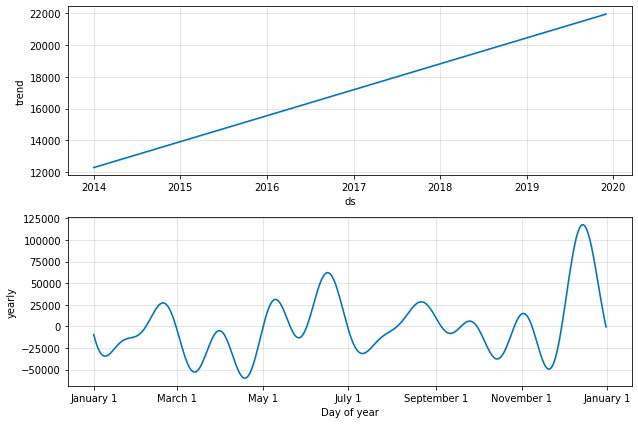

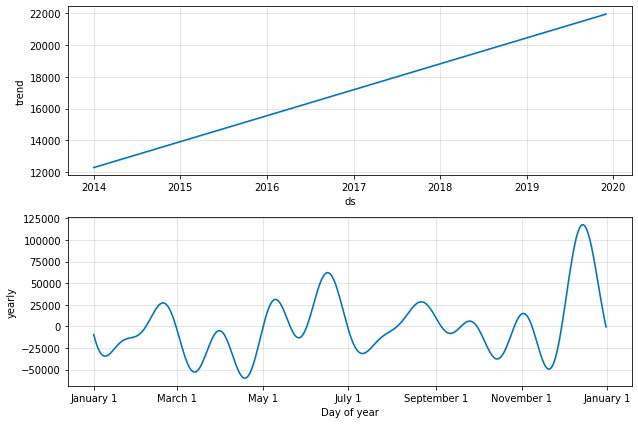

In [117]:
model.plot_components(model.predict(future))